In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import scipy.stats as ss
from pylab import *

In [ ]:
#expanded = []
#for i in range(len(data)):
#    k = data.iloc[i,0]
#    Nk = data.iloc[i,1]
#    newval = [k]*Nk
#    expanded += newval
    
#df = pd.DataFrame({'object':expanded})

# Question 1 #

In [2]:
data = pd.read_csv('textfile1.txt', sep=" ", header=None)
data.columns = ["k", "Nk"]
sum2 = np.cumsum(data['Nk'])
data['y'] = sum2

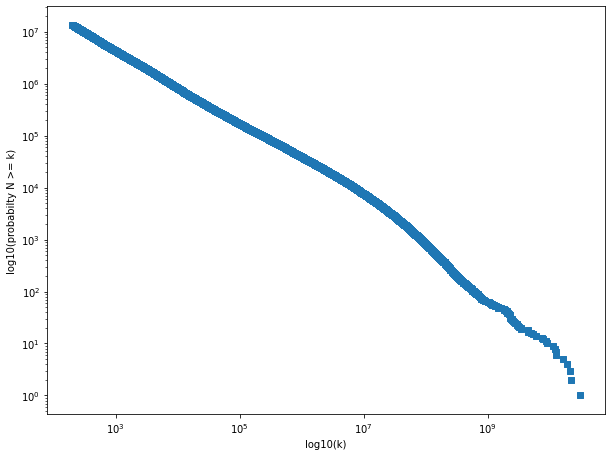

In [4]:
plt.figure(figsize=(9,3))
plt.xlabel("log10(k)")
plt.ylabel("log10(probabilty N >= k)")
plt.scatter(data["k"],data['y'],marker = ",")
plt.xscale("log")
plt.yscale("log")

plt.show()

# Question 2

In [5]:
lowerhalf = data[np.log10(data['k']) < 7.9]
upperhalf = data[np.log10(data['k']) >= 7.9]

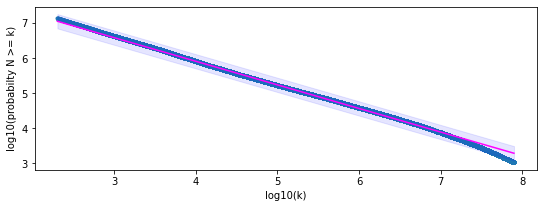

gamma =  -0.6714439843221739
ci =  0.20320021215601194
intercept 8.594018158049792
-(gamma-1) 1.671443984322174


In [6]:
plt.figure(figsize=(9,3))

slope,intercept, r_value, p_value, std_error = stats.linregress(np.log10(lowerhalf["k"]),np.log10(lowerhalf['y']))
Y_pred = slope *np.log10(lowerhalf["k"]) + intercept

ci = 1.96 * np.std(Y_pred)/np.mean(Y_pred)

plt.plot(np.log10(lowerhalf["k"]), Y_pred, color = 'magenta')
plt.scatter(np.log10(lowerhalf["k"]),np.log10(lowerhalf['y']),marker = ".")
plt.xlabel("log10(k)")
plt.ylabel("log10(probabilty N >= k)")
plt.fill_between(np.log10(lowerhalf['k']), (Y_pred-ci), (Y_pred+ci), color='b', alpha=.1)

plt.show()

print("gamma = ", slope)
print("ci = ", ci)
print("intercept", intercept)

gamma = []
gamma.append(slope)

neg_gamma_minus_1 = []
neg_gamma_minus_1.append(-(slope-1))
print('-(gamma-1)', -(slope-1))

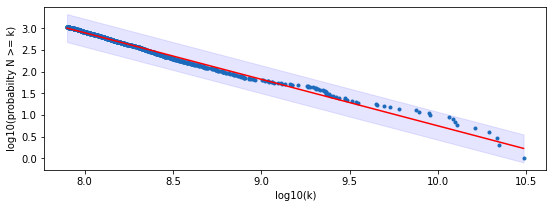

gamma =  -1.0712885736745805
ci =  0.3216243930331881
intercept 11.463848148278897
-(gamma-1) 2.0712885736745807


In [7]:
slope,intercept, r_value, p_value, std_error = stats.linregress(np.log10(upperhalf["k"]),np.log10(upperhalf['y']))
Y_pred = slope *np.log10(upperhalf["k"]) + intercept

ci = 1.96 * np.std(Y_pred)/np.mean(Y_pred)


plt.figure(figsize=(9,3))
plt.xlabel("log10(k)")
plt.ylabel("log10(probabilty N >= k)")
plt.scatter(np.log10(upperhalf["k"]),np.log10(upperhalf['y']),marker = ".")
plt.plot(np.log10(upperhalf["k"]) , Y_pred, color = 'red')
plt.fill_between(np.log10(upperhalf["k"]), (Y_pred-ci), (Y_pred+ci), color='b', alpha=.1)

plt.show()

print("gamma = ",slope)
print("ci = ", ci)
print("intercept", intercept)
gamma.append(slope)

print('-(gamma-1)', -(slope-1))
neg_gamma_minus_1.append(-(slope-1))

# Question 3 and 4

In [8]:
newdata = pd.read_csv('rawtextfile.txt', sep=" ", header=None)
newdata.columns = ['k']
k_sorted = sorted(newdata['k'],reverse = True)
newdata['k'] = k_sorted

lowerhalf = newdata[np.log10(newdata['k']) < 7]
upperhalf = newdata[np.log10(newdata['k']) >= 7]

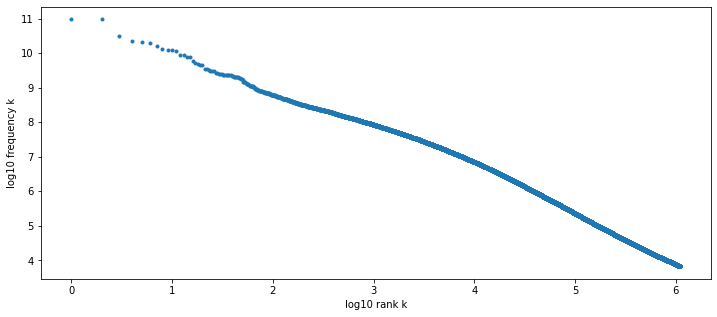

alpha =  -1.0712885736745805
ci =  0.3216243930331881
intercept 11.463848148278897


In [9]:
log10x = np.log10(np.array(range(1, len(newdata['k']) + 1)))
log10frequency = np.log10(np.array(newdata['k']))

plt.figure(figsize=(12,5))
plt.xlabel("log10 rank k")
plt.ylabel("log10 frequency k")
plt.scatter(log10x,log10frequency,marker = ".")

plt.show()
print("alpha = ",slope)
print("ci = ", ci)
print("intercept", intercept)
alpha = []
alpha.append(slope)

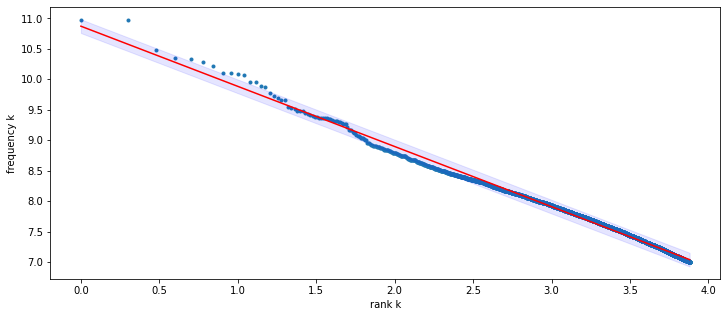

alpha =  -0.9875784322814256
ci =  0.11221030778109467
intercept 10.871730902487322


In [10]:
log10x = np.log10(np.array(range(1, len(upperhalf['k']) + 1)))
log10frequency = np.log10(np.array(upperhalf['k']))

slope,intercept, r_value, p_value, std_error = stats.linregress(log10x,log10frequency)

Y_pred = slope *log10x + intercept

ci = 1.96 * np.std(Y_pred)/np.mean(Y_pred)

plt.figure(figsize=(12,5))
plt.xlabel("rank k")
plt.ylabel("frequency k")
plt.scatter(log10x,log10frequency,marker = ".")
plt.plot(log10x , Y_pred, color = 'red')
plt.fill_between(log10x, (Y_pred-ci), (Y_pred+ci), color='b', alpha=.1)

plt.show()

print("alpha = ",slope)
print("ci = ", ci)
print("intercept", intercept)
alpha.append(slope)

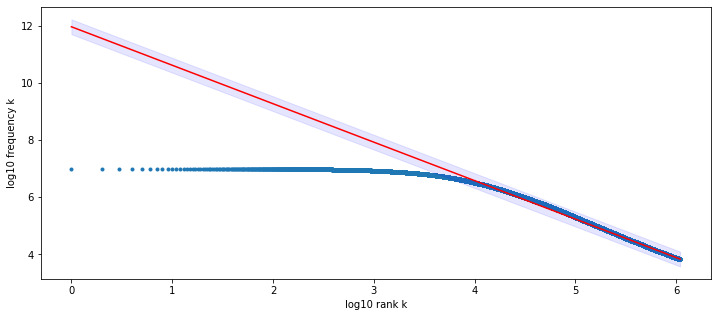

alpha =  -1.3448503247116448
ci =  0.2588503707062586
intercept 11.960756644195783


In [11]:
log10x = np.log10(np.array(range(1, len(lowerhalf['k']) + 1)))
log10frequency = np.log10(np.array(lowerhalf['k']))

slope,intercept, r_value, p_value, std_error = stats.linregress(log10x,log10frequency)

Y_pred = slope *log10x + intercept

ci = 1.96 * np.std(Y_pred)/np.mean(Y_pred)

plt.figure(figsize=(12,5))
plt.xlabel("log10 rank k")
plt.ylabel("log10 frequency k")
plt.scatter(log10x,log10frequency,marker = ".")
plt.plot(log10x , Y_pred, color = 'red')
plt.fill_between(log10x, (Y_pred-ci), (Y_pred+ci), color='b', alpha=.1)

plt.show()
print("alpha = ",slope)
print("ci = ", ci)
print("intercept", intercept)

In [17]:
#alpha = 1/gamma-1
print('gamma:   ', gamma)
print('alpha:   ', alpha)
print('-(gamma-1):   ', neg_gamma_minus_1)



expected_alpha1 = 1/(gamma[1]-1)
expected_alpha2 = 1/(gamma[0]-1)

print('tails')
print(expected_alpha1, abs(alpha[1]))
print('heads')
print(expected_alpha2, abs(alpha[0]))

gamma:    [-0.6714439843221739, -1.0712885736745805]
alpha:    [-1.0712885736745805, -0.9875784322814256]
-(gamma-1):    [1.671443984322174, 2.0712885736745807]
tails
-0.4827912501954977 0.9875784322814256
heads
-0.5982850812709306 1.0712885736745805


# Question 6

In [30]:
girls1952 = pd.read_csv('names-girls1952.txt', sep=",", header=None)
girls2002 = pd.read_csv('names-girls2002.txt', sep=",", header=None)
boys1952 = pd.read_csv('names-boys1952.txt', sep=",", header=None)
boys2002 = pd.read_csv('names-girls2002.txt', sep=",", header=None)

In [31]:
girls1952.columns = ["name", "gender", "frequency"]
sum2 = np.cumsum(girls1952['frequency'])
girls1952['y'] = sum2

girls2002.columns = ["name", "gender", "frequency"]
sum2 = np.cumsum(girls2002['frequency'])
girls2002['y'] = sum2

boys1952.columns = ["name", "gender", "frequency"]
sum2 = np.cumsum(boys1952['frequency'])
boys1952['y'] = sum2

boys2002.columns = ["name", "gender", "frequency"]
sum2 = np.cumsum(boys2002['frequency'])
boys2002['y'] = sum2

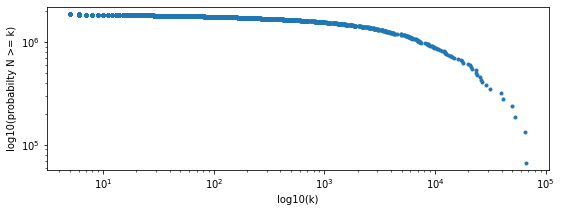

In [49]:
plt.figure(figsize=(9,3))
plt.xlabel("log10(k)")
plt.ylabel("log10(probabilty N >= k)")
plt.scatter(girls1952["frequency"],girls1952['y'],marker = ".")
plt.xscale("log")
plt.yscale("log")

plt.show()

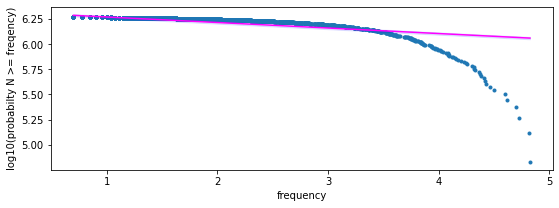

gamma =  -0.05470748518411182
ci =  0.011843073748961395
intercept 6.3232134210135875


In [50]:
plt.figure(figsize=(9,3))

plt.scatter(np.log10(girls1952["frequency"]),np.log10(girls1952['y']),marker = ".")
plt.xlabel("frequency")
slope,intercept, r_value, p_value, std_error = stats.linregress(np.log10(girls1952['frequency']),np.log10(girls1952['y']))
Y_pred = slope *np.log10(girls1952["frequency"]) + intercept
ci = 1.96 * np.std(Y_pred)/np.mean(Y_pred)
plt.ylabel("log10(probabilty N >= freqency)")
plt.plot(np.log10(girls1952["frequency"]), Y_pred, color = 'magenta')
plt.fill_between(np.log10(girls1952['frequency']), (Y_pred-ci), (Y_pred+ci), color='b', alpha=.1)


plt.show()

print("gamma = ", slope)
print("ci = ", ci)
print("intercept", intercept)

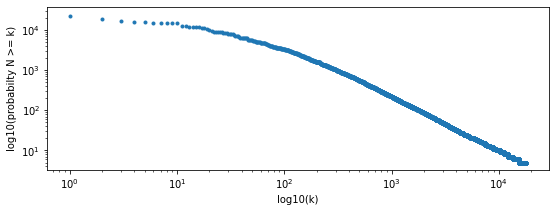

In [62]:
plt.figure(figsize=(9,3))
plt.xlabel("log10(k)")
plt.ylabel("log10(probabilty N >= k)")
plt.scatter(girls2002["name"],girls2002['frequency'],marker = ".")
plt.xscale("log")
plt.yscale("log")

plt.show()

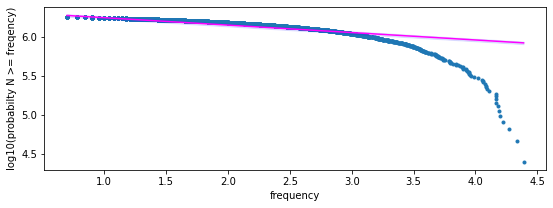

gamma =  -0.09520864335223421
ci =  0.016929418062582552
intercept 6.337813317018698


In [52]:
plt.figure(figsize=(9,3))

plt.scatter(np.log10(girls2002["frequency"]),np.log10(girls2002['y']),marker = ".")
plt.xlabel("frequency")
slope,intercept, r_value, p_value, std_error = stats.linregress(np.log10(girls2002['frequency']),np.log10(girls2002['y']))
Y_pred = slope *np.log10(girls2002["frequency"]) + intercept
ci = 1.96 * np.std(Y_pred)/np.mean(Y_pred)
plt.ylabel("log10(probabilty N >= freqency)")
plt.plot(np.log10(girls2002["frequency"]), Y_pred, color = 'magenta')
plt.fill_between(np.log10(girls2002['frequency']), (Y_pred-ci), (Y_pred+ci), color='b', alpha=.1)


plt.show()

print("gamma = ", slope)
print("ci = ", ci)
print("intercept", intercept)

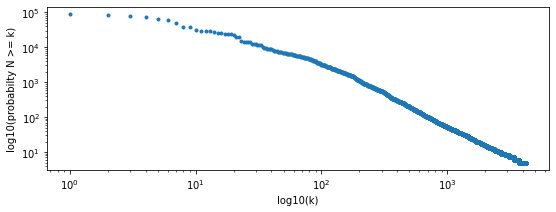

In [55]:
plt.figure(figsize=(9,3))
plt.xlabel("log10(k)")
plt.ylabel("log10(probabilty N >= k)")
plt.scatter(boys1952["name"],boys1952['frequency'],marker = ".")
plt.xscale("log")
plt.yscale("log")

plt.show()

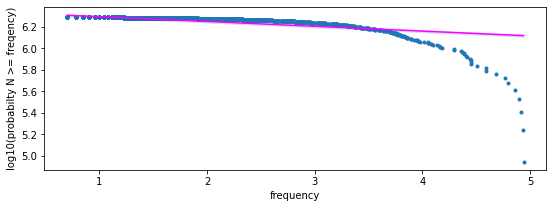

gamma =  -0.044599733016717345
ci =  0.010310262976127126
intercept 6.336232776946852


In [54]:
plt.figure(figsize=(9,3))

plt.scatter(np.log10(boys1952["frequency"]),np.log10(boys1952['y']),marker = ".")
plt.xlabel("frequency")
slope,intercept, r_value, p_value, std_error = stats.linregress(np.log10(boys1952['frequency']),np.log10(boys1952['y']))
Y_pred = slope *np.log10(boys1952["frequency"]) + intercept
ci = 1.96 * np.std(Y_pred)/np.mean(Y_pred)
plt.ylabel("log10(probabilty N >= freqency)")
plt.plot(np.log10(boys1952["frequency"]), Y_pred, color = 'magenta')
plt.fill_between(np.log10(boys1952['frequency']), (Y_pred-ci), (Y_pred+ci), color='b', alpha=.1)


plt.show()

print("gamma = ", slope)
print("ci = ", ci)
print("intercept", intercept)

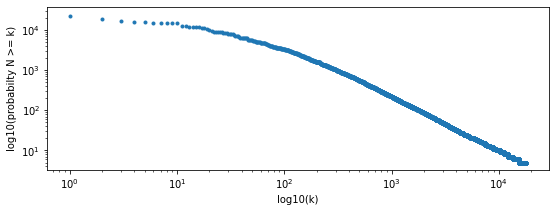

In [59]:
plt.figure(figsize=(9,3))
plt.xlabel("log10(k)")
plt.ylabel("log10(probabilty N >= k)")
plt.scatter(boys2002["name"],boys2002['frequency'],marker = ".")
plt.xscale("log")
plt.yscale("log")

plt.show()

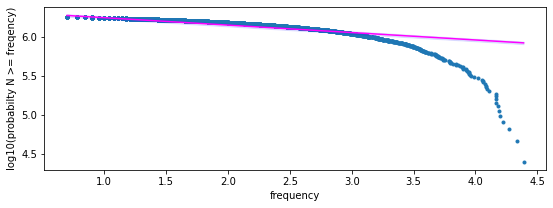

gamma =  -0.09520864335223421
ci =  0.016929418062582552
intercept 6.337813317018698


In [60]:
plt.figure(figsize=(9,3))

plt.scatter(np.log10(boys2002["frequency"]),np.log10(boys2002['y']),marker = ".")
plt.xlabel("frequency")
slope,intercept, r_value, p_value, std_error = stats.linregress(np.log10(boys2002['frequency']),np.log10(boys2002['y']))
Y_pred = slope *np.log10(boys2002["frequency"]) + intercept
ci = 1.96 * np.std(Y_pred)/np.mean(Y_pred)
plt.ylabel("log10(probabilty N >= freqency)")
plt.plot(np.log10(boys2002["frequency"]), Y_pred, color = 'magenta')
plt.fill_between(np.log10(boys2002['frequency']), (Y_pred-ci), (Y_pred+ci), color='b', alpha=.1)


plt.show()

print("gamma = ", slope)
print("ci = ", ci)
print("intercept", intercept)

notes: fix log 10 stuff, fix weird zipf stuff, finish zipf stuff for 6, do 7